In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Customer_Churn_Banker.csv')
df.head()
#new_df dùng cho phân cụm khách hàng
new_df=pd.read_csv('/content/Customer_Churn_Banker.csv')

In [ ]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       10000 non-null  int64 
 1   credit_score      10000 non-null  int64 
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  int64 
 5   tenure            10000 non-null  int64 
 6   balance           10000 non-null  int64 
 7   products_number   10000 non-null  int64 
 8   credit_card       10000 non-null  int64 
 9   active_member     10000 non-null  int64 
 10  estimated_salary  10000 non-null  int64 
 11  churn             10000 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,6.980471e+06,1.530200,0.70550,0.515100,9.089385e+06,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,6.285896e+06,0.581654,0.45584,0.499797,6.128208e+06,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000,5.230000e+02,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000e+00,1.000000,0.00000,0.000000,3.336751e+06,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,8.668510e+06,1.000000,1.00000,1.000000,8.890572e+06,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,1.246215e+07,2.000000,1.00000,1.000000,1.439529e+07,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,2.508981e+07,4.000000,1.00000,1.000000,1.999925e+07,1.000000


In [ ]:
df.groupby(by='country').agg({'customer_id':'count'})

,customer_id
country,
France,5014
Germany,2509
Spain,2477


In [ ]:
df.groupby(by='gender').agg({'customer_id':'count'})

,customer_id
gender,
Female,4543
Male,5457


In [ ]:
df.groupby(by='credit_card').agg({'customer_id':'count'})

,customer_id
credit_card,
0,2945
1,7055


In [ ]:
df.groupby(by='churn').agg({'customer_id':'count'})

,customer_id
churn,
0,7963
1,2037


<Axes: xlabel='active_member,gender'>

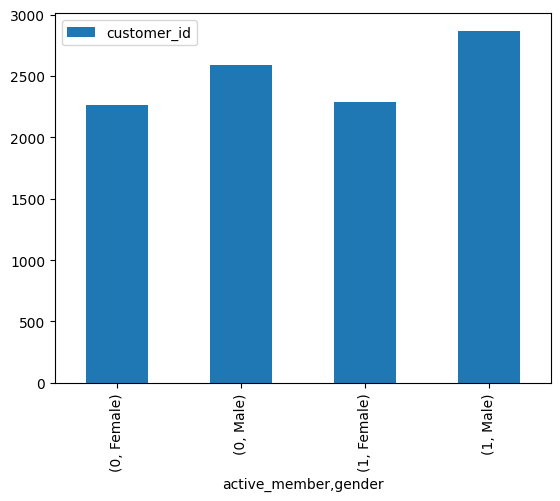

In [ ]:
df.groupby(by=['active_member','gender']).agg({'customer_id':'count'}).plot(kind='bar')

KIỂM TRA LOWERBOUND VÀ UPPERBOUND CỦA TỪNG COLUMN TRONG DỮ LIỆU

In [ ]:
Q1=df['credit_score'].quantile([0.25])
Q3=df['credit_score'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    584.0
Name: credit_score, dtype: float64
Q3: 0.75    718.0
Name: credit_score, dtype: float64
IQR (Interquartile Range): 134.00
lower_bound: 0.25    383.0
Name: credit_score, dtype: float64
upper_bound: 0.75    919.0
Name: credit_score, dtype: float64


In [ ]:
df[df['credit_score']>=upper_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
df[df['credit_score']<=lower_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7,15656148,376,Germany,Female,29,4,11504674,4,1,0,11934688,1
942,15804586,376,France,Female,46,6,0,1,1,0,15733369,1
1193,15779947,363,Spain,Female,28,6,14609843,3,1,0,10061514,1
1405,15612494,359,France,Female,44,6,12874769,1,1,0,14695571,1
1631,15685372,350,Spain,Male,54,1,15267748,1,1,1,19197349,1
1838,15758813,350,Germany,Male,39,0,1097332,2,0,0,12360211,1
1962,15692416,358,Spain,Female,52,8,14354236,3,1,0,14195911,1
2473,15679249,351,Germany,Female,57,4,16314646,1,1,0,16962169,1
2579,15597896,365,Germany,Male,30,0,12776007,1,1,0,8153785,1
5494,15642821,383,Spain,Female,48,8,9580819,1,0,0,13770201,1


In [ ]:
Q1=df['tenure'].quantile([0.25])
Q3=df['tenure'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    3.0
Name: tenure, dtype: float64
Q3: 0.75    7.0
Name: tenure, dtype: float64
IQR (Interquartile Range): 4.00
lower_bound: 0.25   -3.0
Name: tenure, dtype: float64
upper_bound: 0.75    13.0
Name: tenure, dtype: float64


In [ ]:
df[df['tenure']>=upper_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
df[df['tenure']<=lower_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
Q1=df['balance'].quantile([0.25])
Q3=df['balance'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    0.0
Name: balance, dtype: float64
Q3: 0.75    12462152.5
Name: balance, dtype: float64
IQR (Interquartile Range): 12462152.50
lower_bound: 0.25   -18693228.75
Name: balance, dtype: float64
upper_bound: 0.75    31155381.25
Name: balance, dtype: float64


In [ ]:
df[df['balance']>=upper_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
df[df['balance']<=lower_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
Q1=df['estimated_salary'].quantile([0.25])
Q3=df['estimated_salary'].quantile([0.75])
IQR=Q3.iloc[0]-Q1.iloc[0]
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR (Interquartile Range): {IQR:.2f}")
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound}")

Q1: 0.25    3336751.0
Name: estimated_salary, dtype: float64
Q3: 0.75    14395292.75
Name: estimated_salary, dtype: float64
IQR (Interquartile Range): 11058541.75
lower_bound: 0.25   -1.325106e+07
Name: estimated_salary, dtype: float64
upper_bound: 0.75    3.098311e+07
Name: estimated_salary, dtype: float64


In [ ]:
df[df['estimated_salary']>=upper_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
df[df['estimated_salary']<=lower_bound.iloc[0]]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

import timeit
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
df_processed = df.copy()
col_to_process = ['gender']

encoder_dicts = {}
for col in col_to_process: # Dien tat ca column co type = object
  encoder_dict = LabelEncoder()
  df_processed[col] = encoder_dict.fit_transform(df[col])
  encoder_dicts[col] = encoder_dict


# One hot encoding cho multiclass / multilabel
df_processed = pd.get_dummies(df_processed, columns=["country","products_number"], drop_first=False)
#drop cột
df_processed=df_processed.drop(columns='customer_id')
# Normalize du lieu
to_normalize = ['credit_score', 'age', 'balance','estimated_salary']
for col in to_normalize:
  df_processed[col] = (df_processed[col] - df_processed[col].mean())/df_processed[col].std()


#xử lý new_df để sử dụng new_df_processed cho bài toán phân cụm khách hàng
new_df_processed = new_df.copy()
col_to_process = ['gender','country']

encoder_dicts = {}
for col in col_to_process: # Dien tat ca column co type = object
  encoder_dict = LabelEncoder()
  new_df_processed[col] = encoder_dict.fit_transform(new_df[col])
  encoder_dicts[col] = encoder_dict

#drop cột
new_df_processed=new_df_processed.drop(columns=['customer_id','churn'])

In [ ]:
df_processed

,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4
0,-0.326205,0,0.293503,2,-1.110497,1,1,0.170605,1,1,0,0,1,0,0,0
1,-0.440014,0,0.198154,1,0.222771,0,1,0.353264,0,0,0,1,1,0,0,0
2,-1.536717,0,0.293503,8,-0.856499,1,0,0.375929,1,1,0,0,0,0,1,0
3,0.501496,0,0.007456,1,-1.110497,0,0,0.047857,0,1,0,0,0,1,0,0
4,2.063781,0,0.388852,2,0.886208,1,1,-1.354155,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246426,1,0.007456,5,-1.110497,1,0,0.087738,0,1,0,0,0,1,0,0
9996,-1.391870,1,-0.373939,10,-0.197825,1,1,0.176331,0,1,0,0,1,0,0,0
9997,0.604958,0,-0.278590,7,-1.110497,0,1,-0.796453,1,1,0,0,1,0,0,0
9998,1.256772,1,0.293503,3,0.083848,1,0,0.032549,1,0,1,0,0,1,0,0


In [ ]:
new_df_processed

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0,1,1,1,10134888
1,608,2,0,41,1,8380786,1,0,1,11254258
2,502,0,0,42,8,1596608,3,1,0,11393157
3,699,0,0,39,1,0,2,0,0,9382663
4,850,2,0,43,2,12551082,1,1,1,790841
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0,2,1,0,9627064
9996,516,0,1,35,10,5736961,1,1,1,10169977
9997,709,0,0,36,7,0,1,0,1,4208558
9998,772,1,1,42,3,7507531,2,1,0,9288852


In [ ]:
df_processed['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [ ]:
X = df_processed.drop(columns=['churn'])
y = df_processed['churn']

In [ ]:
# train test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
print(Counter(y_train))

Counter({0: 5972, 1: 1528})


In [ ]:
print(Counter(y_valid))

Counter({0: 1991, 1: 509})


In [ ]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

#count y
Counter(y_train_smote)

Counter({0: 5972, 1: 5972})

RANDOM FOREST

In [ ]:
rf=RandomForestClassifier()

In [ ]:
# Grid search
grid_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy']
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train_smote, y_train_smote)
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 30}
Best score: 0.896436101254143


In [ ]:
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_grid.predict(X_valid)
print ('Accuracy: ', accuracy_score(y_pred_rf, y_valid))
print(confusion_matrix(y_pred_rf, y_valid))
print(classification_report(y_pred_rf, y_valid))

Accuracy:  0.8268
[[1783  225]
 [ 208  284]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2008
           1       0.56      0.58      0.57       492

    accuracy                           0.83      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.83      0.83      0.83      2500



In [ ]:
# Random Search
rs_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy']
            }
rf_random = RandomizedSearchCV(rf, rs_space, scoring='accuracy')
model_random = rf_random.fit(X_train_smote, y_train_smote)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'n_estimators': 30, 'max_depth': None, 'criterion': 'entropy'}
Best random search score is: 0.8936728781342179


In [ ]:
rf_random = RandomizedSearchCV(rf, rs_space, scoring='accuracy')
model_random = rf_random.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_random.predict(X_valid)
print ('Accuracy: ', accuracy_score(y_pred_rf, y_valid))
print(confusion_matrix(y_pred_rf, y_valid))
print(classification_report(y_pred_rf, y_valid))

Accuracy:  0.8264
[[1782  225]
 [ 209  284]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2007
           1       0.56      0.58      0.57       493

    accuracy                           0.83      2500
   macro avg       0.73      0.73      0.73      2500
weighted avg       0.83      0.83      0.83      2500



DECISION TREE

In [ ]:
criterion = ['gini', 'entropy', 'log_loss']  # different criterion
for c in criterion:
  # Fit Decision Tree classifer
  clf = DecisionTreeClassifier(criterion=c)
  clf = clf.fit(X_train_smote, y_train_smote)
  y_pred_tree = clf.predict(X_valid)

  # Accuracy
  print(c)
  print('Accuracy: ', accuracy_score(y_pred_tree, y_valid))

  # confusion matrix
  print(confusion_matrix(y_pred_tree, y_valid))
  print(classification_report(y_pred_tree, y_valid))

gini
Accuracy:  0.774
[[1657  231]
 [ 334  278]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1888
           1       0.55      0.45      0.50       612

    accuracy                           0.77      2500
   macro avg       0.69      0.67      0.68      2500
weighted avg       0.76      0.77      0.77      2500

entropy
Accuracy:  0.7812
[[1676  232]
 [ 315  277]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1908
           1       0.54      0.47      0.50       592

    accuracy                           0.78      2500
   macro avg       0.69      0.67      0.68      2500
weighted avg       0.77      0.78      0.78      2500

log_loss
Accuracy:  0.782
[[1683  237]
 [ 308  272]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1920
           1       0.53      0.47      0.50       580

    accuracy               

LOGISTIC REGRESSION

In [ ]:
logres = LogisticRegression()
for c in [1, 3, 10, 50, 100]:
  logres = LogisticRegression(C=c, solver='liblinear')
  model_loggrid = logres.fit(X_train_smote, y_train_smote)
  # accuracy
  y_pred_log = logres.predict(X_valid)
  print ('C='+str(c), accuracy_score(y_pred_log, y_valid))
  print(confusion_matrix(y_pred_log, y_valid))
  print(classification_report(y_pred_log, y_valid))

C=1 0.7876
[[1644  184]
 [ 347  325]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1828
           1       0.64      0.48      0.55       672

    accuracy                           0.79      2500
   macro avg       0.73      0.69      0.71      2500
weighted avg       0.78      0.79      0.78      2500

C=3 0.7888
[[1648  185]
 [ 343  324]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1833
           1       0.64      0.49      0.55       667

    accuracy                           0.79      2500
   macro avg       0.73      0.69      0.71      2500
weighted avg       0.78      0.79      0.78      2500

C=10 0.7888
[[1649  186]
 [ 342  323]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1835
           1       0.63      0.49      0.55       665

    accuracy                           0.79      2500
   macro avg 

Support Vector Machine

In [ ]:
# fit SVC with probability
svc_train = SVC(probability=True)
svc_train.fit(X_train_smote, y_train_smote)  # default SVC
y_pred_svc = svc_train.predict(X_valid)
# accuracy
print ('Accuracy: ', accuracy_score(y_pred_svc, y_valid))
# confusion matrix
print(confusion_matrix(y_pred_svc, y_valid))
print(classification_report(y_pred_svc, y_valid))


Accuracy:  0.7944
[[1661  184]
 [ 330  325]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1845
           1       0.64      0.50      0.56       655

    accuracy                           0.79      2500
   macro avg       0.74      0.70      0.71      2500
weighted avg       0.78      0.79      0.79      2500



In [ ]:
# fit SVC with hyperameter
m = SVC(kernel='rbf',
        degree=10,
        C=30,
        class_weight='balanced')

m.fit(X_train_smote, y_train_smote)

print(classification_report(y_valid, m.predict(X_valid)))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1991
           1       0.53      0.62      0.57       509

    accuracy                           0.81      2500
   macro avg       0.72      0.74      0.73      2500
weighted avg       0.82      0.81      0.82      2500



In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# predict probabilities
lr_probs = svc_train.predict_proba(X_valid)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_valid))]
# calculate scores
ns_auc = roc_auc_score(y_valid, ns_probs)
lr_auc = roc_auc_score(y_valid, lr_probs)

In [ ]:
lr_probs

array([0.37187406, 0.09562054, 0.56705303, ..., 0.83847482, 0.06477413,
       0.05078433])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.825


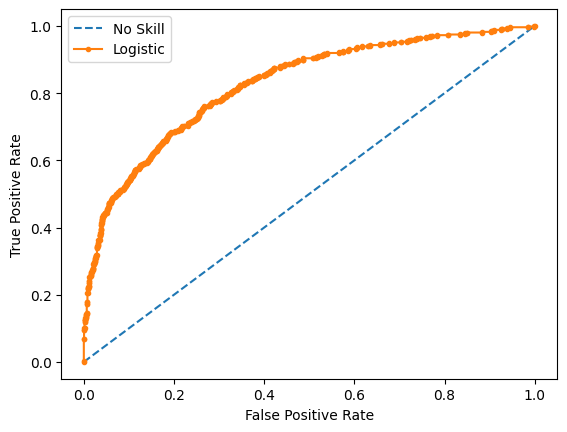

In [ ]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_valid, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_valid, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

K_NEAREST NEIGHBOR, ENSEMBLE LEARNING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
for m in [KNeighborsClassifier(n_neighbors=9),
          AdaBoostClassifier(n_estimators=50,learning_rate=0.1),
          GradientBoostingClassifier(warm_start=True)]:
          model=m
          model.fit(X_train_smote, y_train_smote)
          y_predict = model.predict(X_valid)
          print('Model = ', str(m))
          print ('Accuracy: ', accuracy_score(y_predict, y_valid))
          print(classification_report(y_valid, y_predict))
          print('=' * 40)

Model =  KNeighborsClassifier(n_neighbors=9)
Accuracy:  0.7504
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1991
           1       0.42      0.63      0.51       509

    accuracy                           0.75      2500
   macro avg       0.66      0.71      0.67      2500
weighted avg       0.80      0.75      0.77      2500

Model =  AdaBoostClassifier(learning_rate=0.1)
Accuracy:  0.7644
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1991
           1       0.45      0.66      0.53       509

    accuracy                           0.76      2500
   macro avg       0.67      0.72      0.69      2500
weighted avg       0.81      0.76      0.78      2500

Model =  GradientBoostingClassifier(warm_start=True)
Accuracy:  0.8256
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1991
           1       0.56      0.65     

**Mình tiếp tục tạo lại dữ liệu Test & Train với tỷ lệ 20% và chạy code như thứ tự ở phía trên trên để test với quy mô test train 20%**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Test và Train với tỷ lệ 20%

RANDOM FOREST VỚI GRID SEARCH

In [ ]:
rf=RandomForestClassifier()
# Grid search
grid_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy']
              }
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train, y_train)
# Best hyperparameters
print('Best hyperparameters: '+str(model_grid.best_params_))
print('Best score: '+str(model_grid.best_score_))

Best hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 30}
Best score: 0.8638750000000002


In [ ]:
rf_grid = GridSearchCV(rf, param_grid=grid_space, scoring='accuracy')
model_grid = rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
print ('Accuracy: ', accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_pred_rf, y_test))
print(classification_report(y_pred_rf, y_test))

Accuracy:  0.859
[[1554  237]
 [  45  164]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1791
           1       0.41      0.78      0.54       209

    accuracy                           0.86      2000
   macro avg       0.69      0.83      0.73      2000
weighted avg       0.91      0.86      0.88      2000



RANDOM FOREST VỚI RANDOM SEARCH

In [ ]:
rf=RandomForestClassifier()
# Random Search
rs_space = {'max_depth':[3, 5, 10, None],
              'n_estimators':[10, 20, 30],
              'criterion':['gini','entropy']
            }
rf_random = RandomizedSearchCV(rf, rs_space, scoring='accuracy')
model_random = rf_random.fit(X_train, y_train)

# random random search results
print('Best random search hyperparameters are: '+str(model_random.best_params_))
print('Best random search score is: '+str(model_random.best_score_))

Best random search hyperparameters are: {'n_estimators': 20, 'max_depth': 10, 'criterion': 'entropy'}
Best random search score is: 0.8622499999999998


In [ ]:
rf_random = RandomizedSearchCV(rf, rs_space, scoring='accuracy')
model_random = rf_random.fit(X_train, y_train)
y_pred_rf = rf_random.predict(X_test)
print ('Accuracy: ', accuracy_score(y_pred_rf, y_test))
print(confusion_matrix(y_pred_rf, y_test))
print(classification_report(y_pred_rf, y_test))

Accuracy:  0.8585
[[1549  233]
 [  50  168]]
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1782
           1       0.42      0.77      0.54       218

    accuracy                           0.86      2000
   macro avg       0.69      0.82      0.73      2000
weighted avg       0.91      0.86      0.88      2000



DECISION TREE

In [ ]:
criterion = ['gini', 'entropy', 'log_loss']  # different criterion
for c in criterion:
  # Fit Decision Tree classifer
  clf = DecisionTreeClassifier(criterion=c)
  clf = clf.fit(X_train, y_train)
  y_pred_tree = clf.predict(X_test)

  # Accuracy
  print(c)
  print('Accuracy: ', accuracy_score(y_pred_tree, y_test))

  # confusion matrix
  print(confusion_matrix(y_pred_tree, y_test))
  print(classification_report(y_pred_tree, y_test))

gini
Accuracy:  0.776
[[1351  200]
 [ 248  201]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1551
           1       0.50      0.45      0.47       449

    accuracy                           0.78      2000
   macro avg       0.67      0.66      0.67      2000
weighted avg       0.77      0.78      0.77      2000

entropy
Accuracy:  0.79
[[1377  198]
 [ 222  203]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1575
           1       0.51      0.48      0.49       425

    accuracy                           0.79      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000

log_loss
Accuracy:  0.7945
[[1378  190]
 [ 221  211]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1568
           1       0.53      0.49      0.51       432

    accuracy                

LOGISTIC REGRESSION

In [ ]:
logres = LogisticRegression()
for c in [1, 3, 10, 50, 100]:
  logres = LogisticRegression(C=c, solver='liblinear')
  model_loggrid = logres.fit(X_train, y_train)
  # accuracy
  y_pred_log = logres.predict(X_test)
  print ('C='+str(c), accuracy_score(y_pred_log, y_test))
  print(confusion_matrix(y_pred_log, y_test))
  print(classification_report(y_pred_log, y_test))

C=1 0.8365
[[1534  262]
 [  65  139]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1796
           1       0.35      0.68      0.46       204

    accuracy                           0.84      2000
   macro avg       0.65      0.77      0.68      2000
weighted avg       0.90      0.84      0.86      2000

C=3 0.836
[[1533  262]
 [  66  139]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1795
           1       0.35      0.68      0.46       205

    accuracy                           0.84      2000
   macro avg       0.65      0.77      0.68      2000
weighted avg       0.90      0.84      0.86      2000

C=10 0.8355
[[1533  263]
 [  66  138]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1796
           1       0.34      0.68      0.46       204

    accuracy                           0.84      2000
   macro avg  

SUPPORT VECTOR MACHINE WITH PROBABILITY

In [ ]:
# fit SVC with probability
svc_train = SVC(probability=True)
svc_train.fit(X_train, y_train)  # default SVC
y_pred_svc = svc_train.predict(X_test)
# accuracy
print ('Accuracy: ', accuracy_score(y_pred_svc, y_test))
# confusion matrix
print(confusion_matrix(y_pred_svc, y_test))
print(classification_report(y_pred_svc, y_test))

Accuracy:  0.841
[[1579  298]
 [  20  103]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1877
           1       0.26      0.84      0.39       123

    accuracy                           0.84      2000
   macro avg       0.62      0.84      0.65      2000
weighted avg       0.94      0.84      0.88      2000



SUPPORT VECTORE MACHINE WITH HYPERAMETER

In [ ]:
# fit SVC with hyperameter
m = SVC(kernel='rbf',
        degree=10,
        C=30,
        class_weight='balanced')

m.fit(X_train, y_train)
# accuracy
print ('Accuracy: ', accuracy_score(m.predict(X_test), y_test))
print(classification_report(y_test, m.predict(X_test)))

Accuracy:  0.793
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1599
           1       0.49      0.73      0.59       401

    accuracy                           0.79      2000
   macro avg       0.71      0.77      0.72      2000
weighted avg       0.84      0.79      0.81      2000



KNEIGHBORCLASSIFIER, ADABOOST, GRADIENTBOOSTING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
for m in [KNeighborsClassifier(n_neighbors=7),
          AdaBoostClassifier(n_estimators=50,learning_rate=0.2),
          GradientBoostingClassifier(learning_rate=0.2,warm_start=True)]:
          model=m
          model.fit(X_train, y_train)
          y_predict = model.predict(X_test)
          print('Model = ', str(m))
          print ('Accuracy: ', accuracy_score(y_predict, y_test))
          print(classification_report(y_test, y_predict))
          print('=' * 40)

Model =  KNeighborsClassifier(n_neighbors=7)
Accuracy:  0.8205
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1599
           1       0.60      0.32      0.41       401

    accuracy                           0.82      2000
   macro avg       0.72      0.63      0.65      2000
weighted avg       0.80      0.82      0.80      2000

Model =  AdaBoostClassifier(learning_rate=0.2)
Accuracy:  0.857
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1599
           1       0.80      0.38      0.52       401

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000

Model =  GradientBoostingClassifier(learning_rate=0.2, warm_start=True)
Accuracy:  0.861
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1599
           1       0.

PHÂN CỤM: K_MEANS_CLUSTERING

In [ ]:
new_df_processed

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0,1,1,1,10134888,1
1,608,2,0,41,1,8380786,1,0,1,11254258,0
2,502,0,0,42,8,1596608,3,1,0,11393157,1
3,699,0,0,39,1,0,2,0,0,9382663,0
4,850,2,0,43,2,12551082,1,1,1,790841,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0,2,1,0,9627064,0
9996,516,0,1,35,10,5736961,1,1,1,10169977,0
9997,709,0,0,36,7,0,1,0,1,4208558,1
9998,772,1,1,42,3,7507531,2,1,0,9288852,1


In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report

In [ ]:
X=new_df_processed

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 2, silhouette = 0.4521124028651107


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 3, silhouette = 0.4734785861599632


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 4, silhouette = 0.5289158945755751


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 5, silhouette = 0.4895342705986015


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 6, silhouette = 0.47672924004988027


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 7, silhouette = 0.45294144944174985


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 8, silhouette = 0.4419694273069152


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 9, silhouette = 0.4441036135727686


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 10, silhouette = 0.43326832286194733


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 11, silhouette = 0.4406235505868362


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 12, silhouette = 0.4439520675724105


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 13, silhouette = 0.4355750289285861


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 14, silhouette = 0.42825876490715453


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 15, silhouette = 0.43658424398219603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 16, silhouette = 0.4351756080329653


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 17, silhouette = 0.4336352641087785


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 18, silhouette = 0.425003678451784


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Voi k = 19, silhouette = 0.4273036280525781


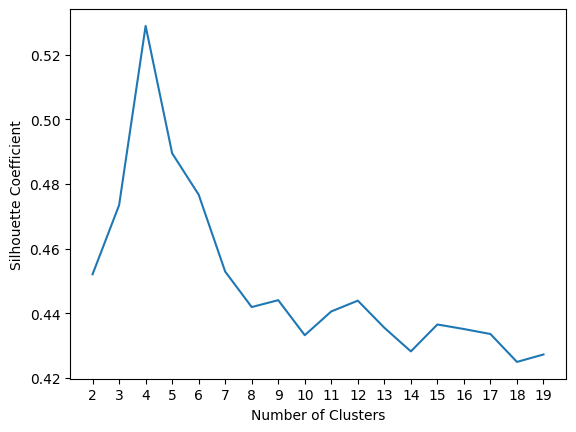

In [ ]:
si = []
for k in range(2, 20):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(X)
 score = silhouette_score(X, kmeans.predict(X))
 si.append(score)
 print(f'Voi k = {k}, silhouette = {score}')

plt.plot(range(2, 20), si)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

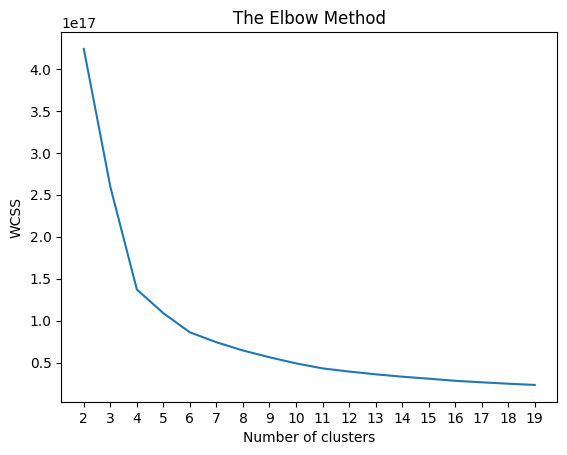

In [ ]:
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss)
plt.xticks(range(2, 20))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


Sau khi tìm được k=4 là k tối ưu nhất, chúng ta thế k vào để phân cụm

In [ ]:
k=4
m = KMeans(n_clusters=k)
m.fit_predict(X)
scores= silhouette_score(X, m.fit_predict(X))
new_df_processed[f'k{k}'] = m.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
scores

0.5289049050527659

In [ ]:
new_df_processed['churn']=new_df['churn']

In [ ]:
new_df_processed

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,k4
0,619,0,0,42,2,0,1,1,1,10134888,1,3
1,608,2,0,41,1,8380786,1,0,1,11254258,0,1
2,502,0,0,42,8,1596608,3,1,0,11393157,1,3
3,699,0,0,39,1,0,2,0,0,9382663,0,3
4,850,2,0,43,2,12551082,1,1,1,790841,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0,2,1,0,9627064,0,3
9996,516,0,1,35,10,5736961,1,1,1,10169977,0,3
9997,709,0,0,36,7,0,1,0,1,4208558,1,2
9998,772,1,1,42,3,7507531,2,1,0,9288852,1,0


<Axes: >

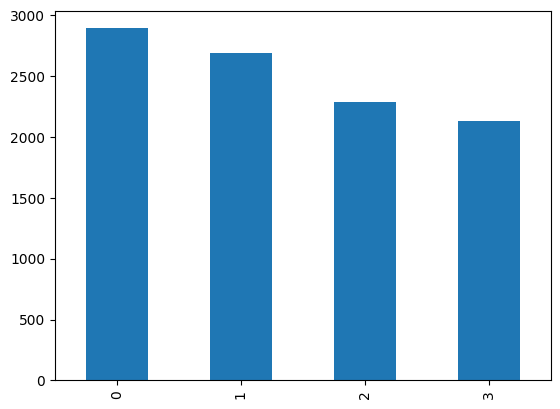

In [ ]:
new_df_processed['k4'].value_counts().plot(kind='bar')

<Axes: xlabel='estimated_salary', ylabel='balance'>

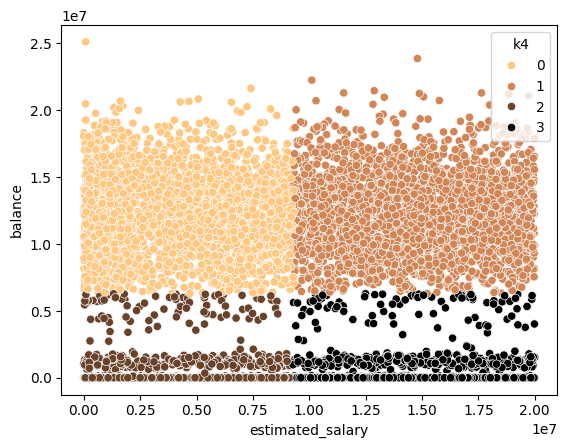

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=new_df_processed, x='estimated_salary', y='balance', hue='k4', palette='copper_r')

## **KẾT LUẬN**

Test lại với 20% dữ liệu
+ Grid_search->random forest: 85,9%
+ Random_search->random forest: 85,85%
+ Decision Tree-> Gini:77,6%, Entropy:79%, Log_loss:79,45%
+ Logistic Regression: 83%
+ Support Vector Machine: with probability:84%, with hyperameter:79%
+ Kneighbor:n=7: 82,05%
+ AdaBoost: learning_rate=0,2 : 86%
+ Gradient Boosting: learning_rate=0,2 : 86%

=> Dựa theo bảng thống kê theo tiêu chí Precision, Recall và F1-Score, ta nhận thấy với dữ liệu Test-Train 20% thì thuật toán GradientBoostingClassifier là model học tốt nhất.
Đoán 88%(precision) người có khả năng NOT Churn và 95%(recall) trong 88%(precesion) là thực sự NOT Churn. F1-Score là 0.92 gần tiến về 1 chứng tỏ khả năng học của mô hình cực kỳ tốt.
Đoán 85%(precision) người có khả năng Churn và 49%(recall) trong 85%(precesion) là thực sự Churn. F1-Score là 0.62 vẫn cao hơn các thuật toán khác chứng tỏ GradientBoostingClassifier phân tích hiệu quả nhất.